In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import re

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [64]:
years = range(1880, 2011)
pieces = []
for year in years:
    path = "./res/babynames/yob%d.txt" % year 
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)

In [77]:
names = pd.concat(pieces, ignore_index=True)

In [84]:
# 연도와 성별로 데이터 재구성
total_births = pd.pivot_table(names, index="year", columns="sex", values="births", aggfunc=sum)

In [85]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


### 각 연도별 이름의 비율 조사

In [86]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [87]:
names.groupby(["year", "sex"]).births.sum().head(10)

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
      M      113687
1883  F      112322
      M      104632
1884  F      129021
      M      114445
Name: births, dtype: int64

In [89]:
def add_prop(group):
    # print(group)
    #print(group.births / group.births.sum())
    group["prop"] = group.births / group.births.sum()
    return group
names = names.groupby(["year", "sex"]).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### 연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출

In [90]:
def get_top1000(group):
    return group.sort_values(by="births", ascending=False)[:1000] # 각 그룹별 출생수 기준 내림차순 정렬

grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000 # 특정 연도는 1000개의 데이터가 안됨
top1000.index = np.arange(len(top1000))
top1000.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            261867, 261868, 261869, 261870, 261871, 261872, 261873, 261874,
            261875, 261876],
           dtype='int64', length=261877)

### 이름 유행 분석

In [91]:
boys = top1000[top1000.sex == "M"]
girls = top1000[top1000.sex == "F"]

In [92]:
# 131 rows × 6868 columns 
# 1880-2010년도마다 각 상위의 이름들 1000개를 중복을 제외하고 합산했을 때 6868개
total_births = pd.pivot_table(top1000, index="year", columns="name", aggfunc=sum, values="births")
total_births.info()
total_births.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F702798588>,
      dtype=object)

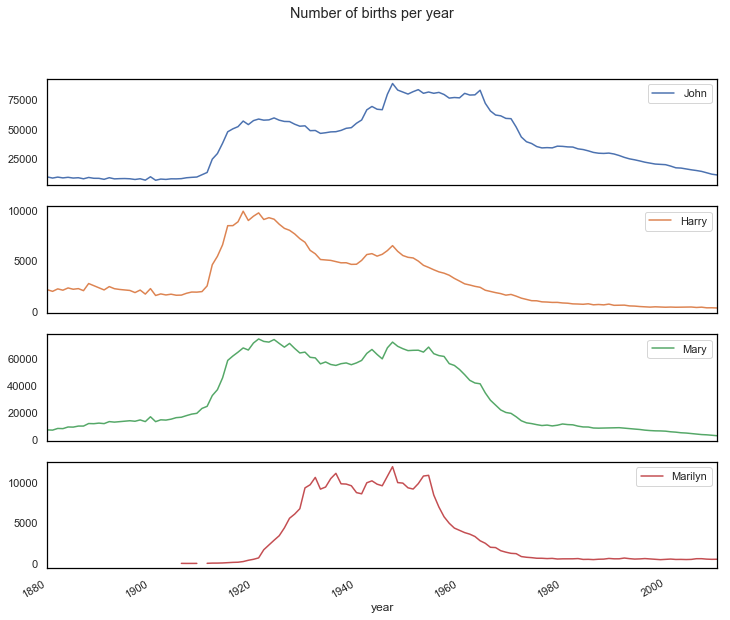

In [93]:
sub_set = total_births[["John", "Harry", "Mary", "Marilyn"]]
sub_set.plot(subplots=True, figsize=(12, 10), title="Number of births per year")

In [98]:
# 각 연도별 상위 이름 1000개의 % 합산
# 최근에 가까워질수록 이름이 다양화되고 있음을 알 수 있다(남자보다 여자에서 뚜렸하게 나타남)
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)
table.head(10)

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


In [99]:
table.tail(10)

sex,F,M
year,,
2001,0.784125,0.882799
2002,0.780403,0.879775
2003,0.774850,0.876747
2004,0.767291,0.870077
2005,0.762426,0.866514
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003
2009,0.737290,0.845256


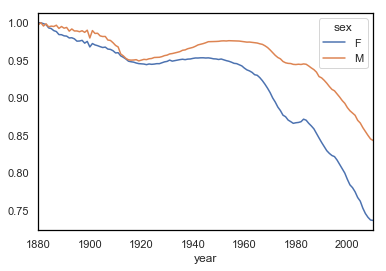

In [107]:
table.plot()

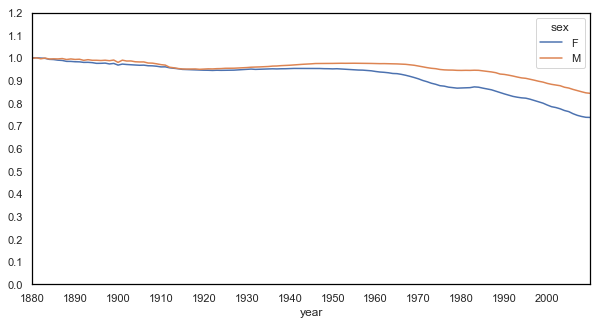

In [129]:
table.plot(xticks=range(1880, 2010, 10), yticks=np.linspace(0, 1.2, 13), figsize=(10, 5))

In [130]:
df = boys[boys.year == 2010]
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [131]:
prop_cumsum = df.sort_values(by="prop", ascending=False).prop.cumsum() # 비율의 누적합
prop_cumsum[:10] # 10등까지 차지하는 비율 8% → 연도별로 조사하면 이름의 다양화를 좀 더 자세히 알 수 있음

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [132]:
type(prop_cumsum)

pandas.core.series.Series

In [133]:
prop_cumsum.values

array([0.01152297, 0.02093414, 0.0299592 , 0.03892999, 0.04781651,
       0.05657871, 0.06515496, 0.0734141 , 0.08152785, 0.08962106,
       0.09764789, 0.10540608, 0.11285189, 0.12027558, 0.12767241,
       0.13502288, 0.14236755, 0.14960266, 0.15682671, 0.16402073,
       0.17072223, 0.17719089, 0.18345201, 0.18965519, 0.19581465,
       0.2018324 , 0.20776851, 0.21357767, 0.21935364, 0.22507009,
       0.23057741, 0.23605576, 0.24151251, 0.24696821, 0.25239072,
       0.25747663, 0.26250776, 0.26753783, 0.27241251, 0.27717762,
       0.28179576, 0.28638704, 0.29085031, 0.29530516, 0.29975263,
       0.30404892, 0.30833468, 0.31260199, 0.31681137, 0.32091592,
       0.32494882, 0.32897594, 0.33294458, 0.33688004, 0.3407644 ,
       0.34463822, 0.34849361, 0.3523274 , 0.35615751, 0.35991702,
       0.36365547, 0.36736863, 0.37107073, 0.3746738 , 0.37809039,
       0.38146011, 0.38479453, 0.38812526, 0.39140226, 0.3945207 ,
       0.39752379, 0.40042626, 0.40320231, 0.40597309, 0.40872

In [134]:
prop_cumsum.values.searchsorted(0.5) # 정렬된 상태에서 0.5가 되는 지점의 index 

116

In [135]:
prop_cumsum.values[116]

0.5006516075268308

In [136]:
df = boys[boys.year == 1900]
df.head()

,name,sex,births,year,prop
40877,John,M,9834,1900,0.065319
40878,William,M,8580,1900,0.056990
40879,James,M,7246,1900,0.048129
40880,George,M,5405,1900,0.035901
40881,Charles,M,4102,1900,0.027246


In [140]:
in1900 = df.sort_values(by="prop", ascending=False).prop.cumsum() 
in1900[:10] 

40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
40882    0.259003
40883    0.283672
40884    0.306767
40885    0.324854
40886    0.342163
Name: prop, dtype: float64

In [138]:
in1900.values.searchsorted(0.5)

24

In [139]:
in1900.values[24]

0.5036332478711958

2010년의 상위 50%의 이름은 116개, 1900년의 상위 50%의 이름은 24개. 약 5배 다양해졌다

In [163]:
def get_quantile_count(group, q=0.5): # quantile: 분위수 q=0.5 → 0.5지점
    group = group.sort_values(by="prop", ascending=False)
    return group.prop.cumsum().searchsorted(0.5)
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity.head(10)

year  sex
1880  F      37
      M      13
1881  F      37
      M      13
1882  F      37
      M      14
1883  F      38
      M      14
1884  F      38
      M      15
dtype: int64

In [164]:
diversity.unstack("year")

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,
F,37,37,37,38,38,39,40,40,41,42,...,163,169,177,190,198,208,222,233,240,245
M,13,13,14,14,15,15,15,16,16,17,...,80,82,86,91,95,98,102,108,113,116


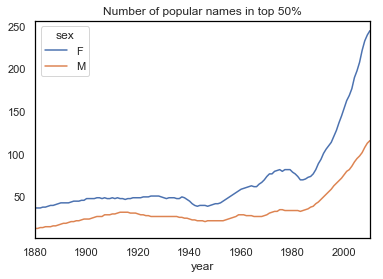

In [167]:
diversity = diversity.unstack("sex")
diversity.head(10)
 # 각 연도별 성별에 따른 상위 50% 이름의 종류의 수
diversity.plot(title="Number of popular names in top 50%")
# 항상 여성의 이름이 남성보다 다양했다
# 약 1980년대를 지나면서 이름의 다양성이 폭발적으로 증가했다

In [170]:
# importing pandas module  
import pandas as pd  
    
# importing numpy module  
import numpy as np  
    
# creating list 
list =[0, 2, 3, 7, 12, 12, 15, 24] 
  
# creating series 
series = pd.Series(list) 
  
# values to be inserted 
val =[1, 7, 14] 
  [0, 2, 3, 7, 12, 12, 15, 24] 
# calling .searchsorted() method 
result = series.searchsorted(value = val) 
result

array([1, 3, 6], dtype=int64)

In [182]:
# 마지막 글자 추출
get_last_letter = lambda x: x[-1]

In [183]:
last_letters = names.name.map(get_last_letter)

이름을 글자로 분리 → 알파벳 문자 비율의 변화

In [298]:
last_letters.name = "last_letter" # 자료에 대한 별칭
last_letters

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1690754    n
1690755    n
1690756    n
1690757    n
1690758    l
1690759    n
1690760    a
1690761    o
1690762    h
1690763    i
1690764    h
1690765    n
1690766    r
1690767    n
1690768    n
1690769    n
1690770    n
1690771    i
1690772    n
1690773    b
1690774    e
1690775    t
1690776    n
1690777    r
1690778    n
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [189]:
# 연도, 성별에 대한 마지막 문자의 개수 계산
table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)

In [193]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [195]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

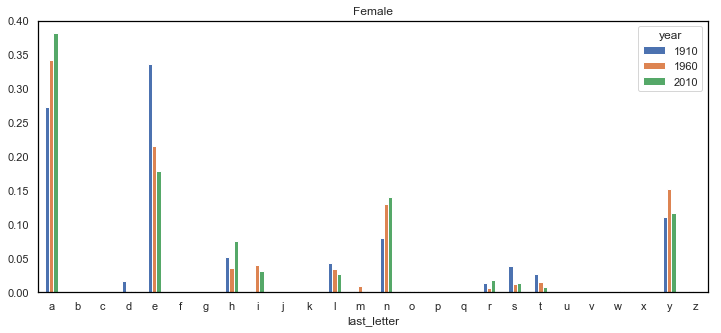

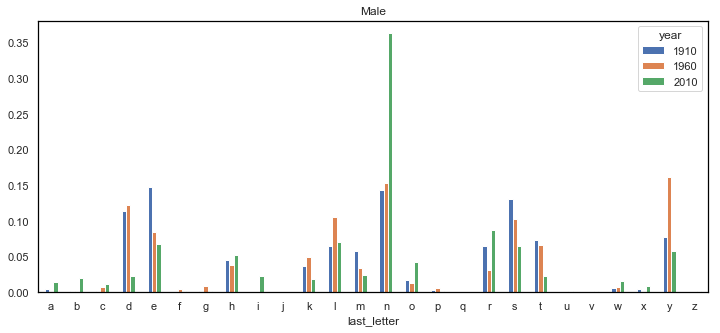

In [203]:
letter_prop["F"].plot.bar(rot=0, figsize=(12, 5), title="Female")
letter_prop["M"].plot.bar(rot=0, figsize=(12, 5), title="Male")

### d/ n/ y로 끝나는 이름을 가진 남자아이의 출생 비율

In [207]:
letter_prop = table / table.sum()
letter_prop

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   
f                 NaN       NaN       NaN       NaN       NaN       NaN   
g            0.000077  0.000054  0.000111  0.000071  0.000186  0.000083   
h            0.053444  0.052025  0.051618  0.050756  0.051170  0.049784   
i            0.000670  0.000848  0.000751  0.000677  0.000651  0.000691   
j                 NaN       NaN       NaN       NaN       NaN       NaN   
k            0.000143  0.000163  0.000102  0.000151  0.000163  0.000135   
l            0.027925  0.031657  0.032703  0.034259  0.037265  0.038660   
m            0.000637  0.000620  0.000751  0.000766  0.000612  0.000564   
n            0.033057  0.032179  0.033157  0.034161  0.034932  0.035587   
o            0.000330  0.000533  0.000325  0.000418  0.000574  0.000631   
p                 NaN       NaN       NaN       NaN       NaN       NaN   
q                 NaN       NaN       NaN       NaN       NaN       NaN   
r            0.005286  0.004535  0.005471  0.005698  0.005565  0.006005   
s            0.015287  0.014311  0.015178  0.015972  0.015804  0.015986   
t            0.023650  0.023544  0.022244  0.022738  0.021896  0.021713   
u            0.004176  0.004644  0.003802  0.003953  0.003798  0.003720   
v                 NaN       NaN       NaN       NaN       NaN       NaN   
w                 NaN  0.000054       NaN       NaN       NaN       NaN   
x                 NaN       NaN       NaN  0.000062       NaN       NaN   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   
z            0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
a            0.339703  0.335258  0.332764  0.328706  ...  0.020162  0.020019   
b                 NaN       NaN       NaN       NaN  ...  0.026256  0.025418   
c                 NaN       NaN       NaN       NaN  ...  0.013972  0.014048   
d            0.006967  0.007035  0.007266  0.007703  ...  0.031352  0.028794   
e            0.372802  0.372324  0.373675  0.373736  ...  0.074927  0.074603   
f                 NaN       NaN       NaN       NaN  ...  0.000906  0.000937   
g            0.000125  0.000171  0.000246  0.000157  ...  0.001108  0.001075   
h            0.049440  0.048917  0.048312  0.049482  ...  0.044297  0.045429   
i            0.000588  0.000719  0.000789  0.000751  ...  0.010812  0.012177   
j                 NaN       NaN       NaN       NaN  ...  0.000551  0.000561   
k            0.000187  0.000130  0.000118  0.000123  ...  0.021890  0.021683   
l            0.039581  0.042299  0.044225  0.047065  ...  0.079180  0.079163   
m            0.000713  0.000617  0.000689  0.000768  ...  0.021627  0.022003   
n            0.036267  0.037758  0.038252  0.039822  ...  0.317495  0.325086   
o            0.000643  0.000664  0.000750  0.000796  ...  0.042332  0.042900   
p                 NaN       NaN       NaN       NaN  ...  0.001762  0.001628   
q                 NaN       NaN       NaN       NaN  ...  0.000310  0.000319   
r            0.006344  0.006234  0.006757  0.006806  ...  0.085224  0.085006   
s            0.017463  0.019201  0.020053  0.020009  ...  0.074100  0.071995   
t            0.020873  0.021509  0.021362  0.021214  ...  0.0245

In [209]:
dny_ts = letter_prop.ix[["d", "n", "y"]]
dny_ts

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
n            0.033057  0.032179  0.033157  0.034161  0.034932  0.035587   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
d            0.006967  0.007035  0.007266  0.007703  ...  0.031352  0.028794   
n            0.036267  0.037758  0.038252  0.039822  ...  0.317495  0.325086   
y            0.103336  0.102615  0.100380  0.098677  ...  0.071687  0.069397   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
d            0.027069  0.026118  0.025420  0.025075  0.024451  0.023574   
n            0.336344  0.341151  0.344319  0.351666  0.358274  0.361101   
y            0.066197  0.064781  0.062806  0.060338  0.059634  0.060342   

sex                              
year             2009      2010  
last_letter                      
d            0.023398  0.023387  
n            0.362523  0.362771  
y            0.057223  0.058168  

[3 rows x 262 columns]

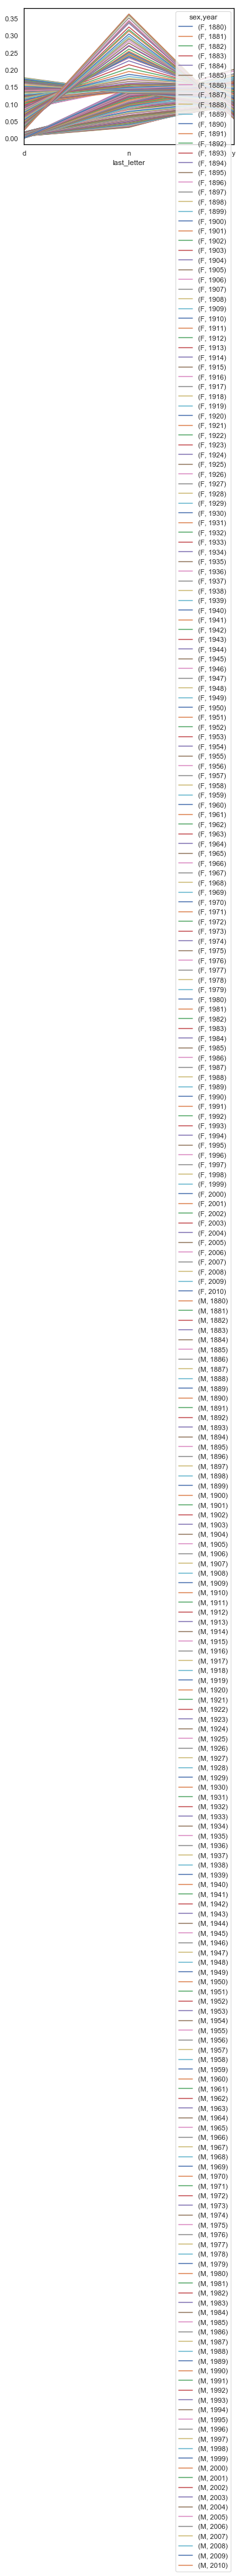

In [210]:
dny_ts.plot()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


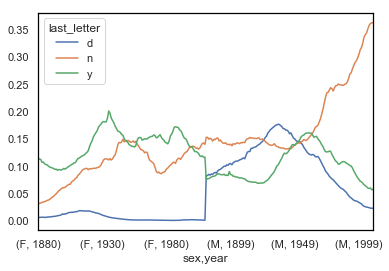

In [213]:
dny_ts = letter_prop.ix[["d", "n", "y"]].T
dny_ts.plot()

In [221]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
rnames = ["user_id", "movie_id", "rating", "timestamp"]
mnames = ["movie_id", "title", "genres"]

users = pd.read_csv("./res/movielens/users.dat", names = unames, header=None, sep="::")
ratings = pd.read_csv("./res/movielens/ratings.dat", names=rnames, header=None, sep="::")
movies = pd.read_csv("./res/movielens/movies.dat", names=mnames, header=None, sep="::")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [222]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip           6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [223]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [224]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [230]:
data = pd.merge(pd.merge(ratings, users), movies) # user_id로 merge → movie_id로 merge
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [231]:
data.ix[0]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

### 성별에 따른 각 영화의 평균 평점 

In [246]:
data.groupby(["title", "gender"]).rating.mean().shape

(7152,)

In [248]:
data.groupby(["title", "gender"]).rating.mean().head()

title                      gender
$1,000,000 Duck (1971)     F         3.375000
                           M         2.761905
'Night Mother (1986)       F         3.388889
                           M         3.352941
'Til There Was You (1997)  F         2.675676
Name: rating, dtype: float64

In [247]:
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")
mean_ratings.shape

(3706, 2)

In [250]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [252]:
ratings_by_title = data.groupby("title").size()
ratings_by_title["X-Men (2000)"]

1511

In [256]:
ratings_by_title[ratings_by_title >= 250].head()

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [260]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [261]:
len(active_titles)

1216

In [266]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [270]:
top_female_ratings = mean_ratings.sort_index(by="F", ascending=False)
top_female_ratings.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [276]:
mean_ratings["diff"] = np.abs(mean_ratings["M"] - mean_ratings["F"])
mean_ratings.head()

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
101 Dalmatians (1996),3.240000,2.911215,0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024


In [280]:
# 성별에 따라 취향이 달라지는 영화
sorted_by_diff = mean_ratings.sort_index(by="diff", ascending=False)
sorted_by_diff.head(10)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224


In [282]:
sorted_by_diff[::-1][:5]

gender,F,M,diff
title,,,
Tender Mercies (1983),3.905405,3.905263,0.000142
"Mystery, Alaska (1999)",3.434783,3.435780,0.000997
Jerry Maguire (1996),3.758315,3.759424,0.001109
Trainspotting (1996),3.958974,3.960432,0.001457
Robin Hood: Prince of Thieves (1991),3.161290,3.163347,0.002056


In [284]:
data.groupby("title")["rating"].std().head() # 편차가 클수록 호불호가 강하다

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

[[데이터 출처]](https://www.kaggle.com/tmdb/tmdb-movie-metadata/downloads/tmdb-5000-movie-dataset.zip/2)

In [2]:
import json

In [3]:
fr = open("./res/bitly_usagov/example.txt")
fr.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
records = [json.loads(line) for line in open("./res/bitly_usagov/example.txt", encoding="utf8")]
records[0]["tz"]

'America/New_York'

In [7]:
[rec["tz"] for rec in records if "tz" in rec] # rec에 "tz"값이 있다면 추출

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci